### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
df = pd.read_csv('Marketing_data.csv') 

**CUST_ID** : Identification of Credit Card holder (Categorical)

**BALANCE** : Total amount of money that you owe to your credit card company

**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment

**CASH_ADVANCE** : Cash in advance given by the user

**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFF_PURCHASES_FREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASES_INSTALLMENTS_FREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASH_ADVANCE_FREQUENCY** : How frequently the cash in advance being paid

**CASH_ADVANCE_TRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX** : Numbe of purchase transactions made

**CREDIT_LIMIT** : Limit of Credit Card for user

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user

**PRC_FULL_PAYMENT** : Percent of full payment paid by user

**TENURE**: Tenure of credit card service for user

In [3]:
# Display the dataset
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# Get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Describe the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Mean BALANCE is $1,564

- BALANCE_FREQUENCY is frequently updated on average ~0.9

- PURCHASES average is $1,000

- ONEOFF_PURCHASES average is ~$600

- Average PURCHASES_FREQUENCY is around 0.5

- Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY

- Average CREDIT_LIMIT is ~$4,500

- Average PRC_FULL_PAYMENT is 15%

- Average TENURE is 11.5 years


## Data Cleaning

### Visualize and Explore Dataset

In [6]:
# Check the missing data
print(df.isnull().sum())
print('----------------------------------------\n Percentage of missing data: \n')
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
----------------------------------------
 Percentage of missing data: 

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


> Here we have calculated the percentage of data that are missing
>> There are two variables with missing data, namely CREDIT_LIMIT and MINIMUM_PAYMENTS. The missing values in these columns make up a insignificant percentage of the data set and can be safely deleted without risking a loss in data. The missing data in CREDIT_LIMIT make up less than 1% of the data and in MINIMUM_PAYMENTS only around 3%.

In [7]:
# Fill up the missing elements with mean of the MINIMUM_PAYMENTS
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the CREDIT_LIMIT
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# Chek duplicated entries in the data
df.duplicated().sum()

0

In [9]:
# Drop Customer ID column 'CUST_ID'
df.drop('CUST_ID', axis = 1, inplace = True)

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## EDA

In [10]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

- Distplot combines the matplotlib.hist function with seaborn kdeplot().

- KDE Plot represents the Kernel Density Estimate.

- KDE is used for visualizing the Probability Density of a continuous variable.

- KDE demonstrates the probability density at different values in a continuous variable

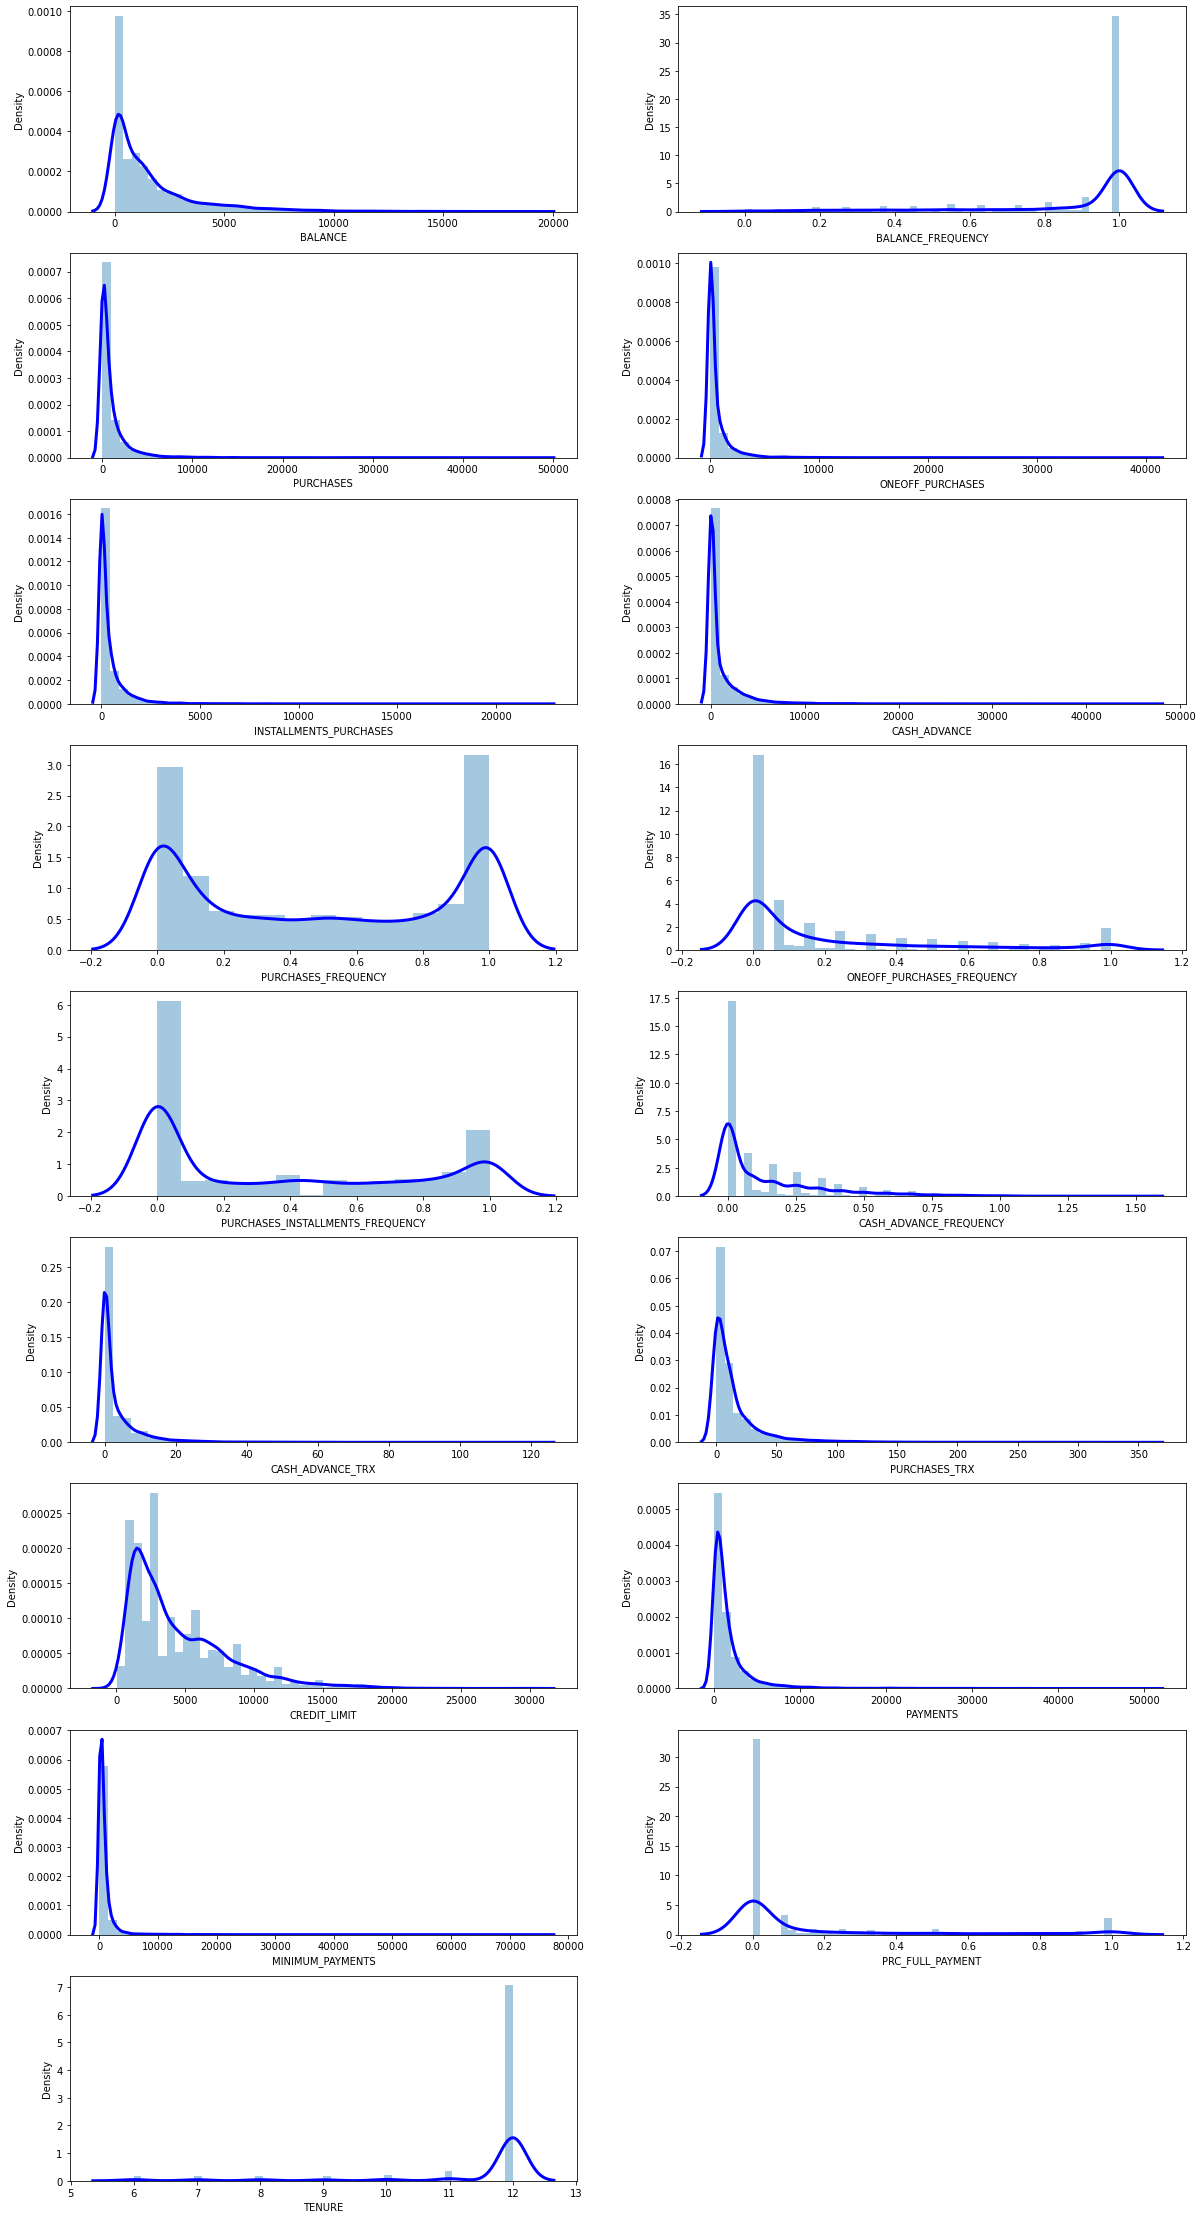

In [11]:
plt.rcParams['figure.figsize'] =(20,40)
for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = df.columns[num]
    sns.distplot(df[col], ax=ax,kde_kws={'color':'b', 'lw':3, 'label':'KDE'})
    
    
plt.show()

> Above are the distribution plots of every variables in the dataframe
>> Here we have the overview of the whole distribution of the dataframe. We can see right away that these distributions are very left skewed and there are a lot of zero values.

Text(0.5, 0, 'Balance')

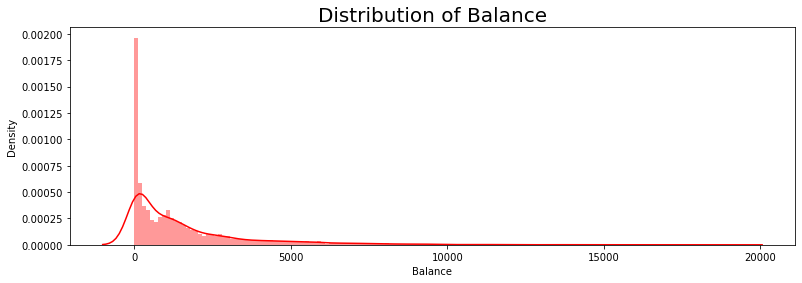

In [12]:
plt.rcParams['figure.figsize'] = (13,4)

sns.distplot(df['BALANCE'],bins=150,color = 'r')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

>By keeping the balance low (in this case zero) but the credit limit high,would increase the credit utilization ratio and in turn increases overall credit score.

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

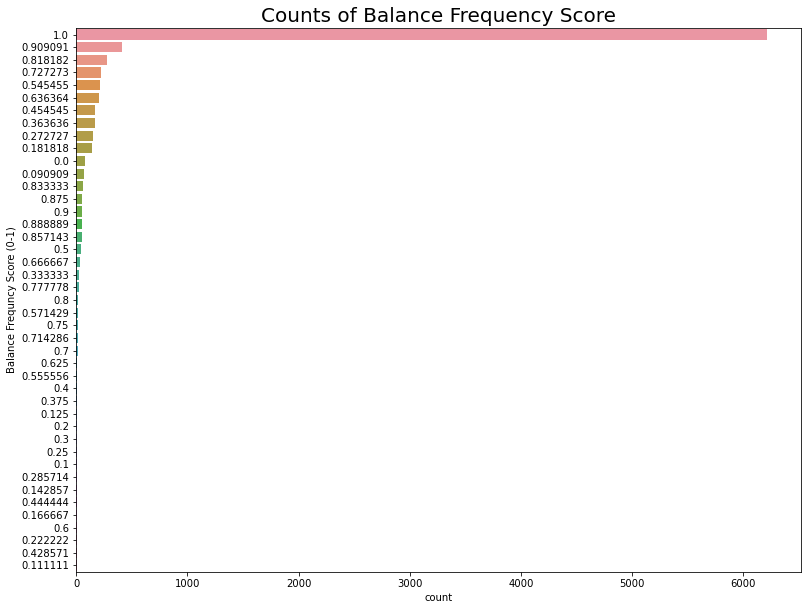

In [13]:
plt.rcParams['figure.figsize'] = (13,10)

sns.countplot(y=df['BALANCE_FREQUENCY'],order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

>We can see here most of the accounts have the score of one, the best score,most people do use credit card frequently and only a small number of people keep their cards relatively inactive.

Text(0.5, 0, 'Purchases')

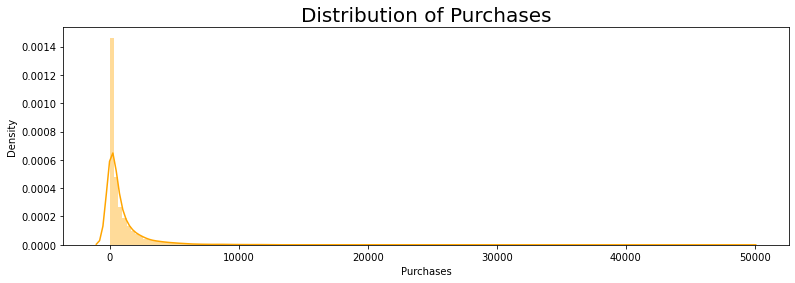

In [14]:
plt.rcParams['figure.figsize'] = (13,4)

sns.distplot(df['PURCHASES'], color='orange', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

>Many people have the purchase amounts of 0 since earlier alot of people are holding zero balance cards.

Text(0.5, 0, 'Amount')

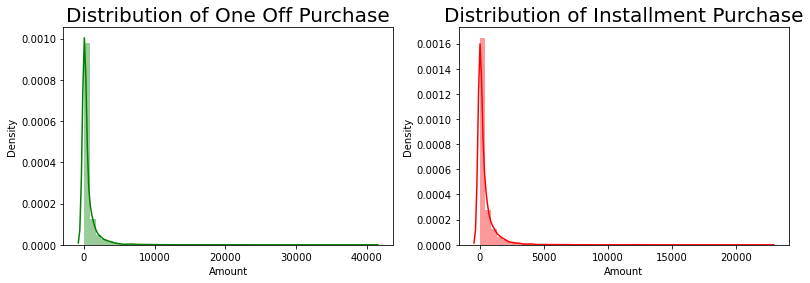

In [15]:
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')

>This still follows that same trend of zeros balance account. One off purchases go up as high as more than 40,000 dollars while the highest installment purchases go up to around 25,000 dollars.

Text(0, 0.5, 'Credit limit')

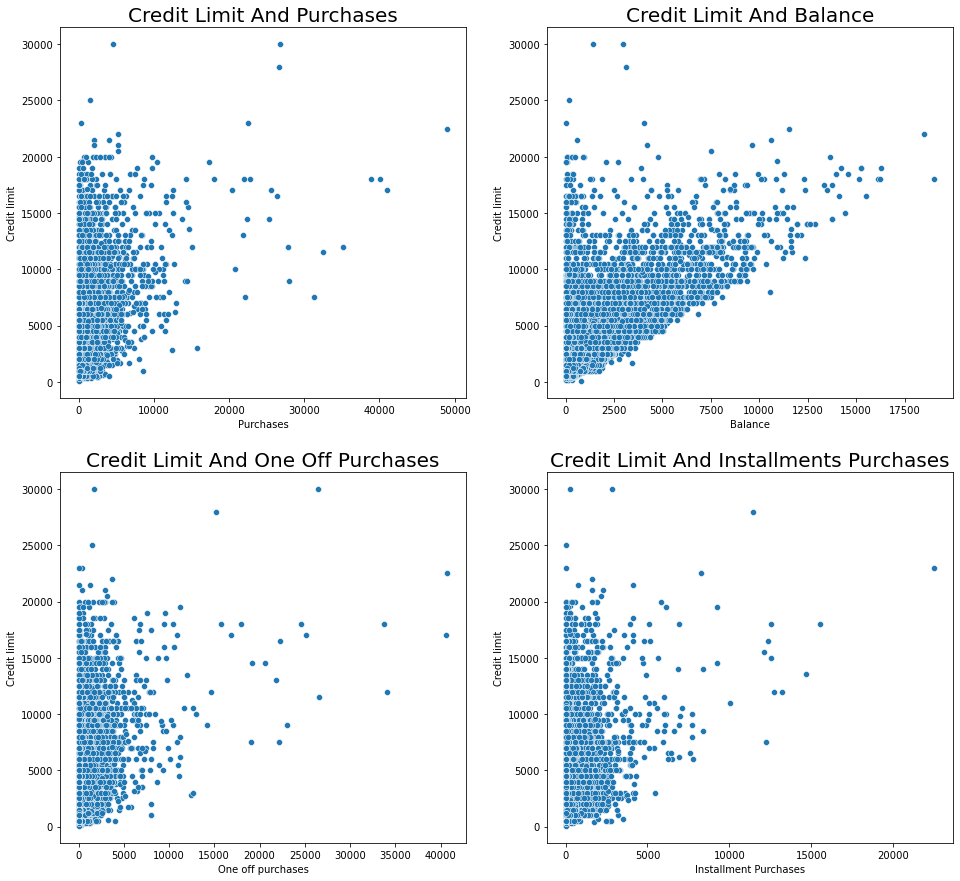

In [16]:
plt.rcParams['figure.figsize'] = (16,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

>There seems to be no strong correlation between the credit limit and these variables.For most people, credit cards are tools for credit utilization rather than spending device.
>>As for balance, there seems to be a better correlation that as credit limit goes up balance also goes up but it is also clear to see that there are also points where balance stays at zeros but credit limits do go up.

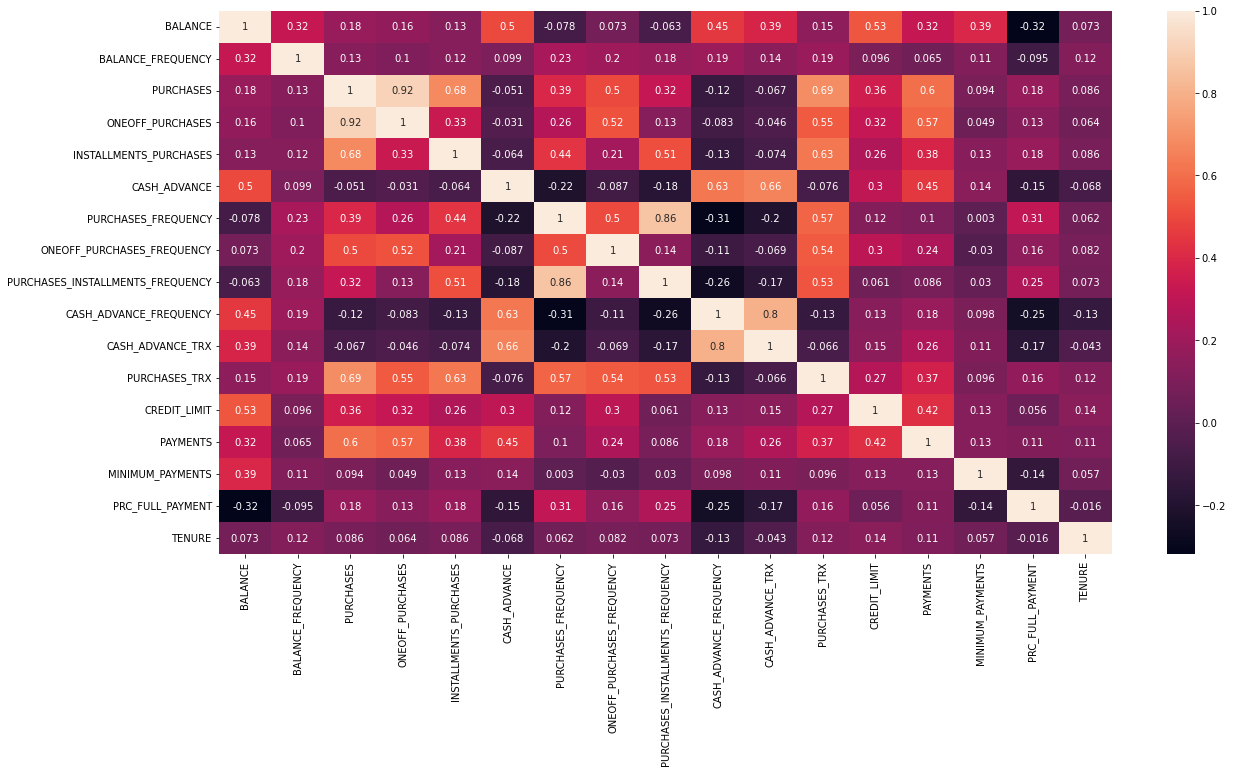

In [17]:
# Correlation matrix between features
correlations = df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot = True);

>Above is the heatmap of the dataset
>> Here we can take a closer look at the correlation with in the dataset. Purchases and one off purchase have very high correlation as we would expect at 0.92. This is the same for varaibles and their frequency score counter parts such as cash advance trx and cash advance frequency at 0.8. Not surprisingly things like balance and payment have poor correlation. This tell us that the data do make sense. 

Text(0.5, 0, 'Months')

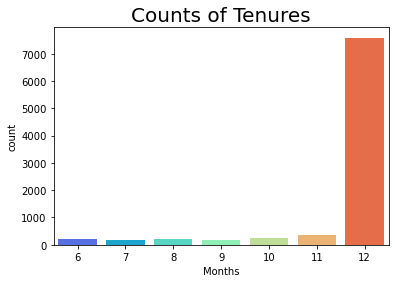

In [18]:
plt.rcParams['figure.figsize'] = (6,4)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

>Tenure is the repayment period of the cards, ranging from 6-12 months.Most of the cards are 12 months cards.

# Model Building

### Find the Optimal Number of Clusters Using Elbow Method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [19]:
# Scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled.shape

(8950, 17)

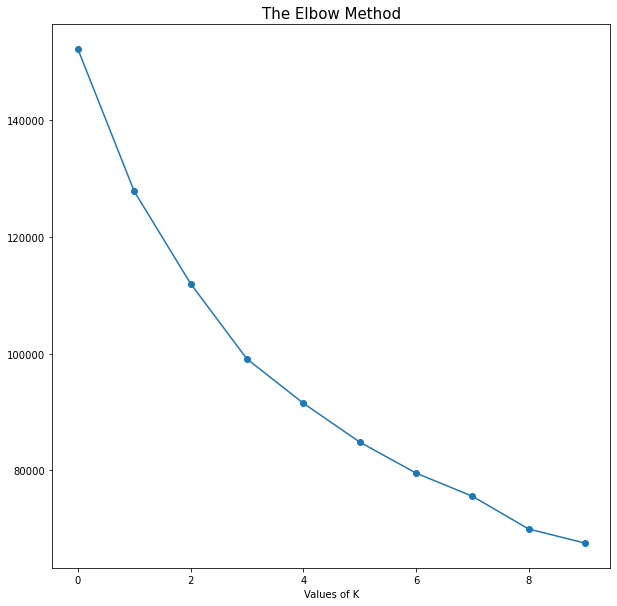

In [20]:
scores_1 = []
range_values = range(1,11)

for i in range_values:
    kmeans = KMeans(n_clusters = i,init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize = (10,10)) 
plt.plot(scores_1,marker = 'o')
plt.xlabel('Values of K', fontsize = 10)
plt.title('The Elbow Method', fontsize = 15);

> Here is the graph deplicting the elbow method used to find the optimum number clusters using kmean analysis
>>We tried different number of clusters from 1-10 and then we graph inertia or wcss (within clusters sum square) against the cluster number. Inertia is basically how close the datapoints in the clusters are to the centers, which means the lower it is the more fitting the points are to their respective clusters. Here, we are trying to find the place where the wcss is as low as possible while still keeping the number of clusters as low as possible.
>>>Here the optimum number of clusters is 4 cluster since it is the place where the graph starts to flatten out meaning that having higher number of clusters will not yield a much more fitting machine.

### Apply K-Means Method

In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # Labels (cluster) associated to each data point
kmeans.cluster_centers_.shape

(4, 17)

In [22]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
1,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
2,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


- First customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money. Cluster with lowest balance, lowest cash advance, and percentage of full payment = 23%. 
- Second customers cluster (Revolvers): who use credit card as a loan (most lucrative sector): highest balance and cash advance, low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%).
- Third customers cluster (VIP/Prime): high credit limit $16,000, and highest percentage of full payment, target for increase credit limit and increase spending habits. 
- Fourth customers cluster (Low tenure): these are customers with low tenure (7 years), low balance.

In [23]:
# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [24]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([3, 1, 0, ..., 0, 3, 3])

In [25]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


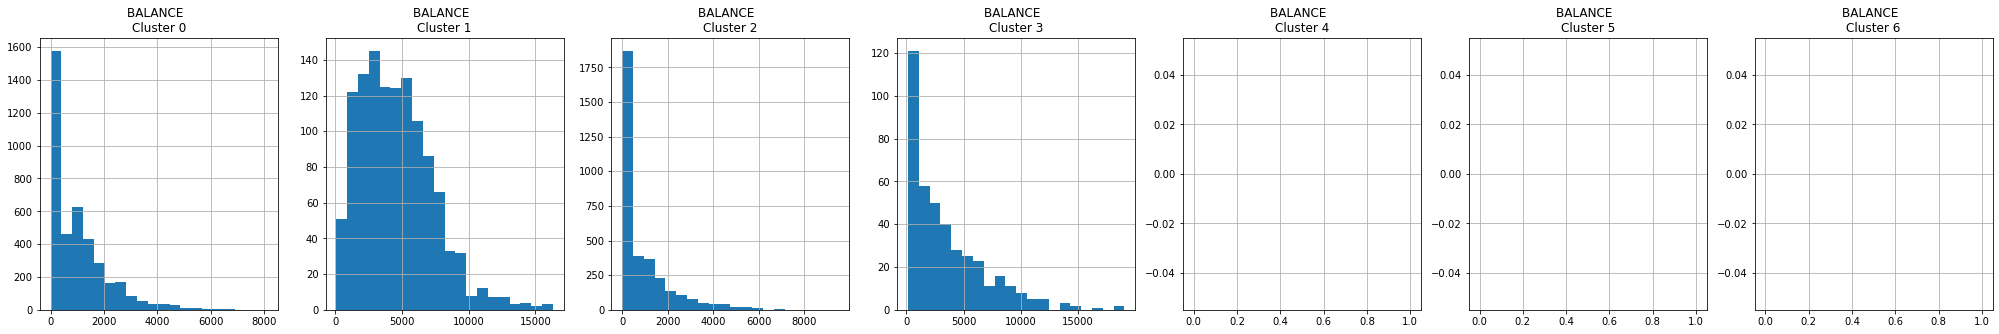

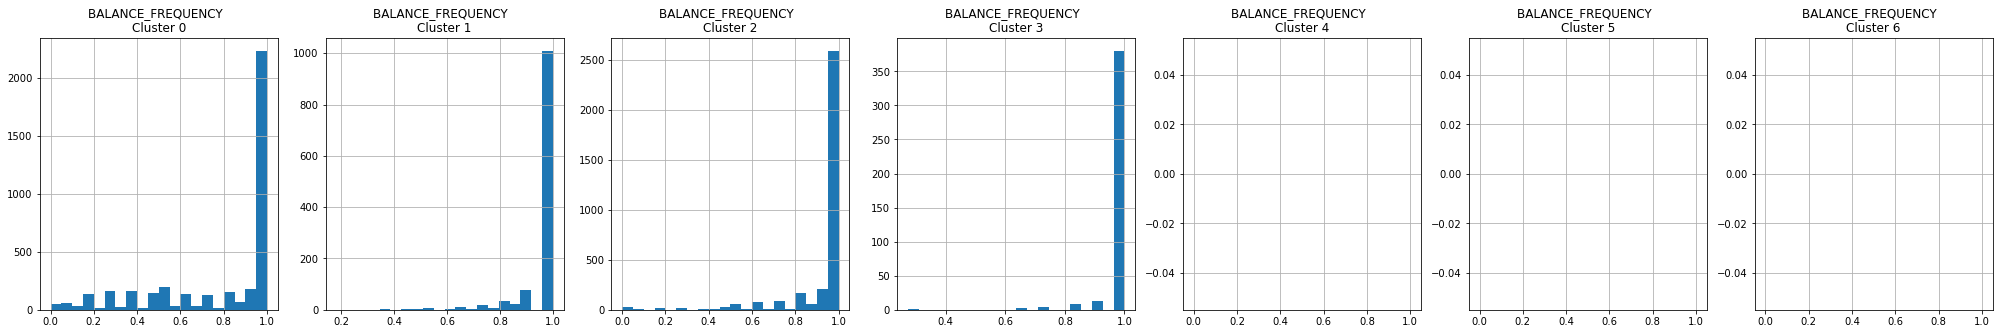

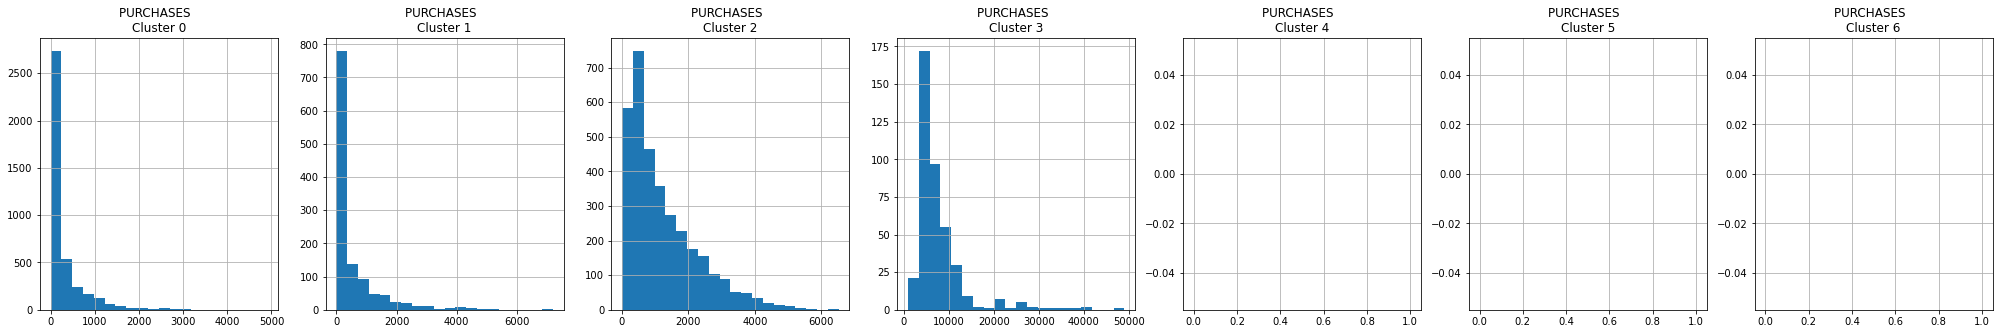

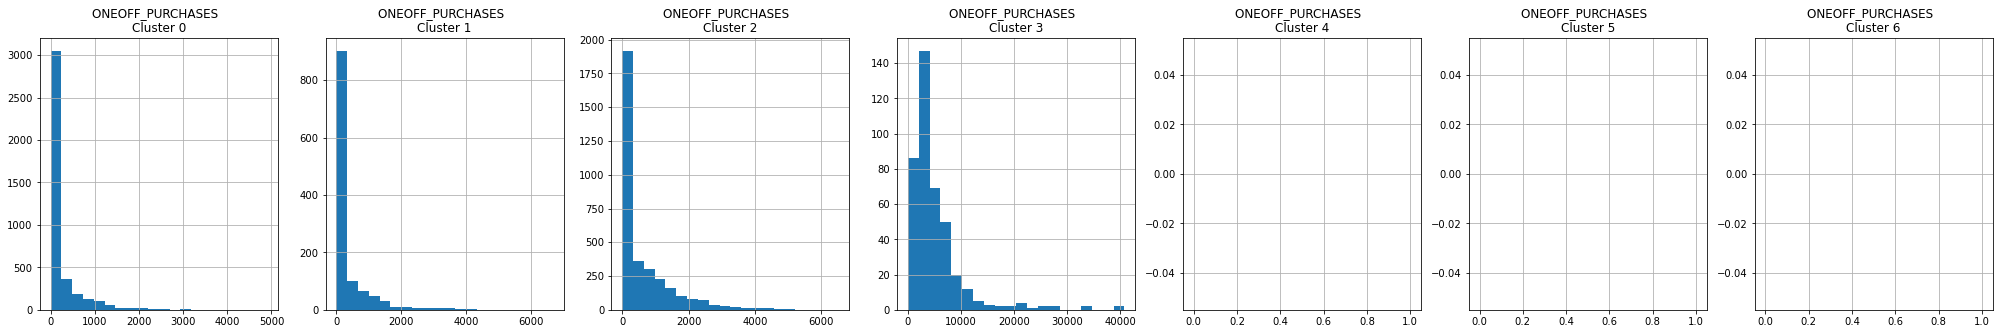

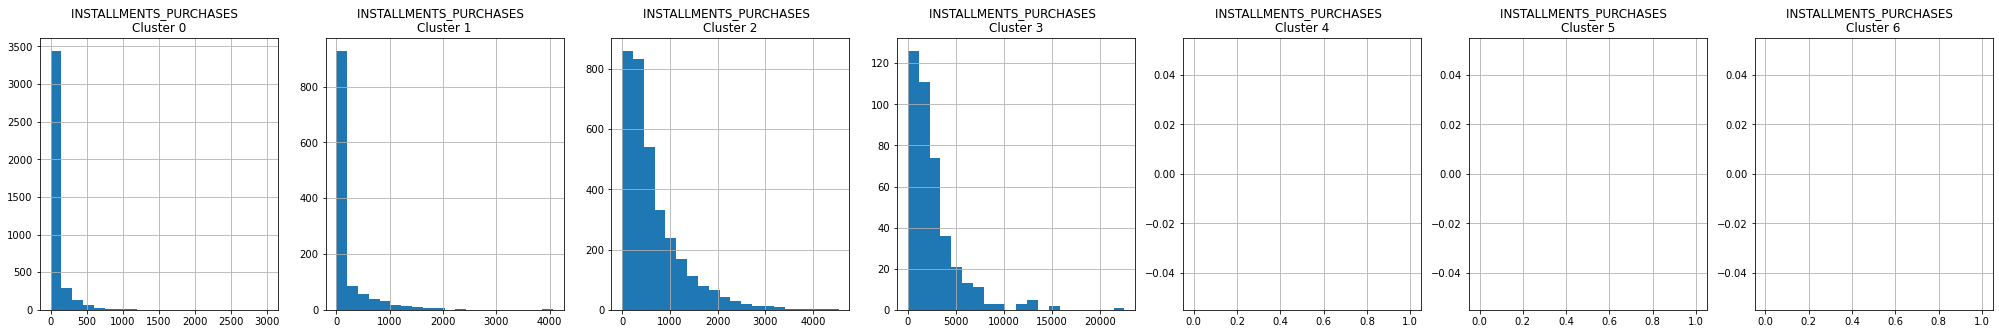

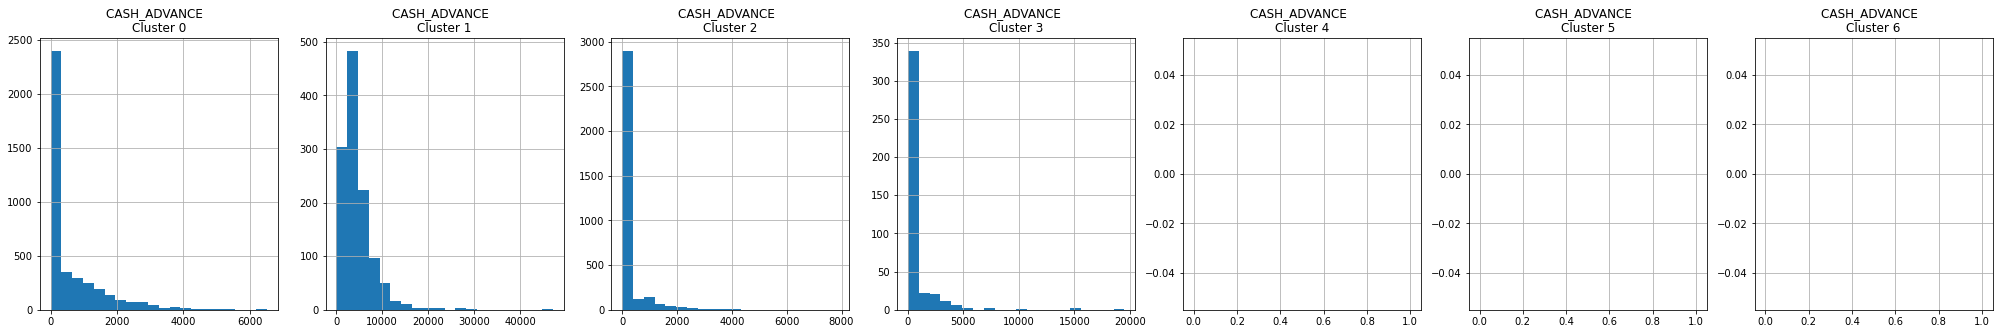

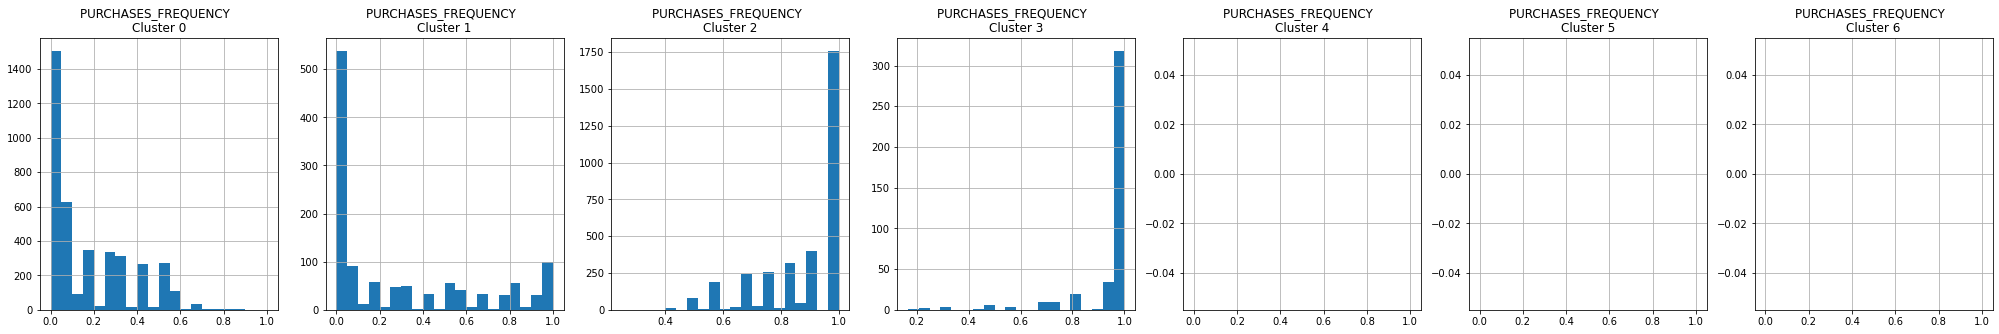

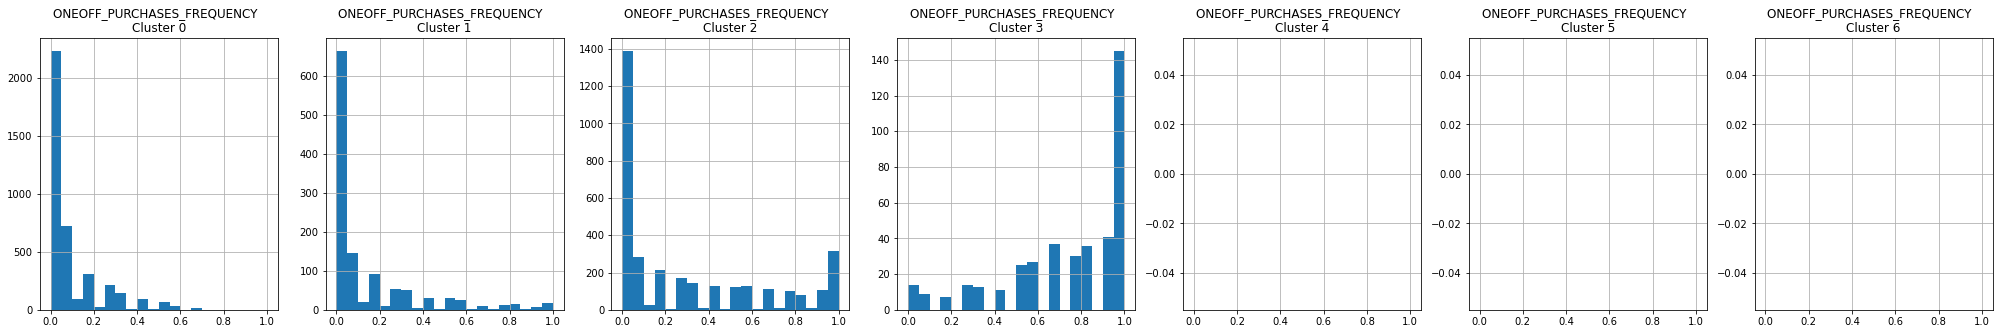

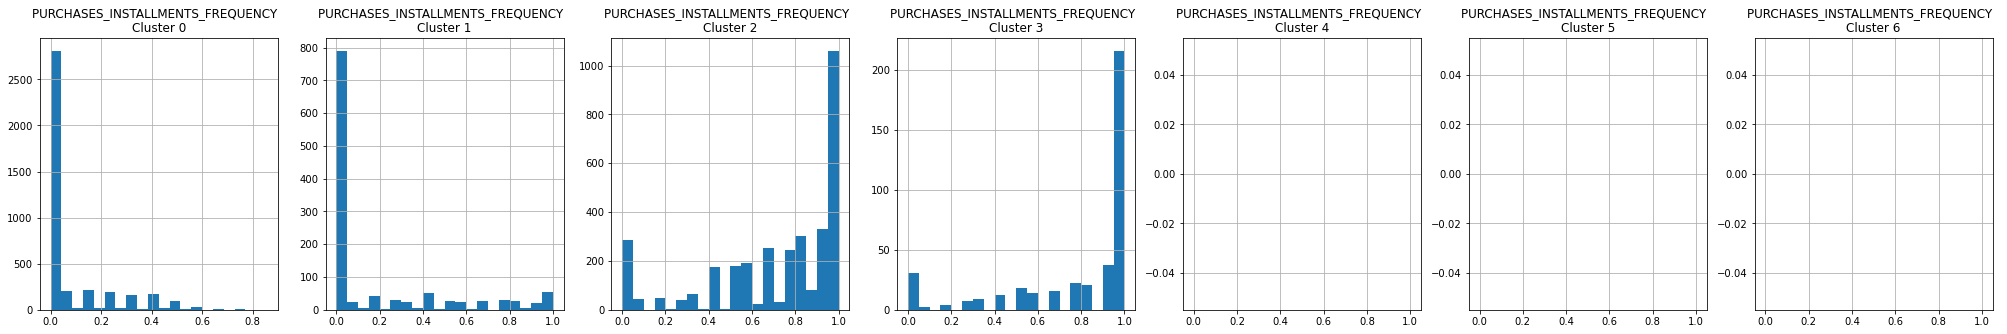

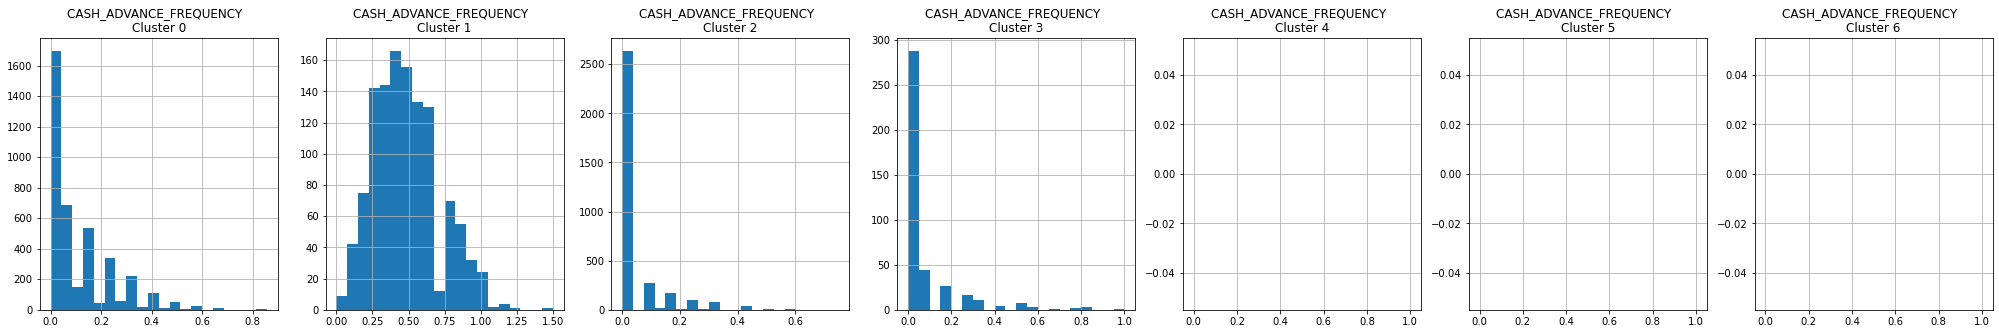

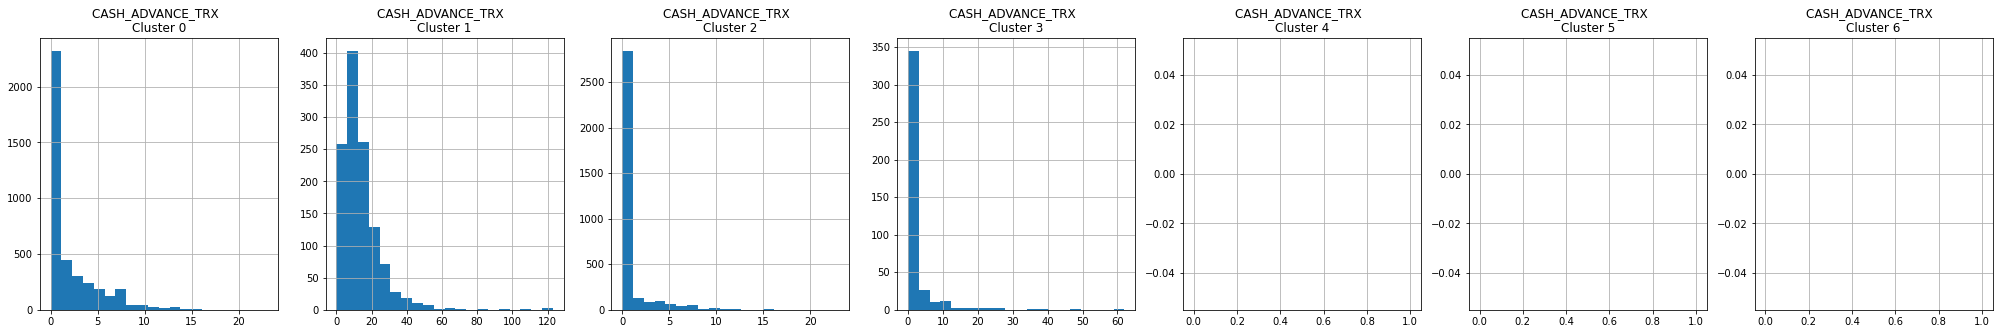

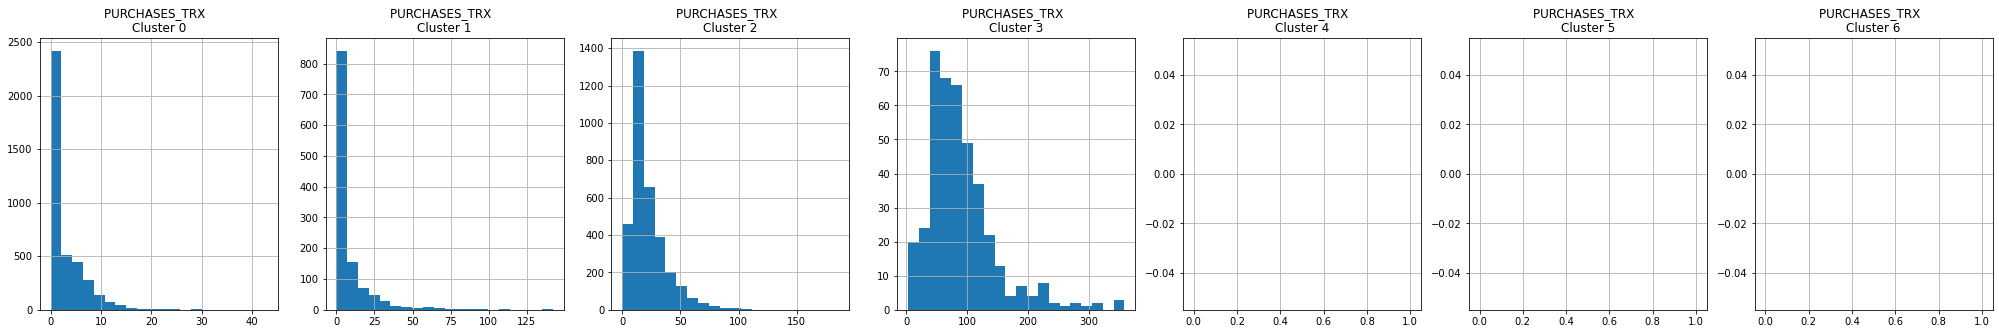

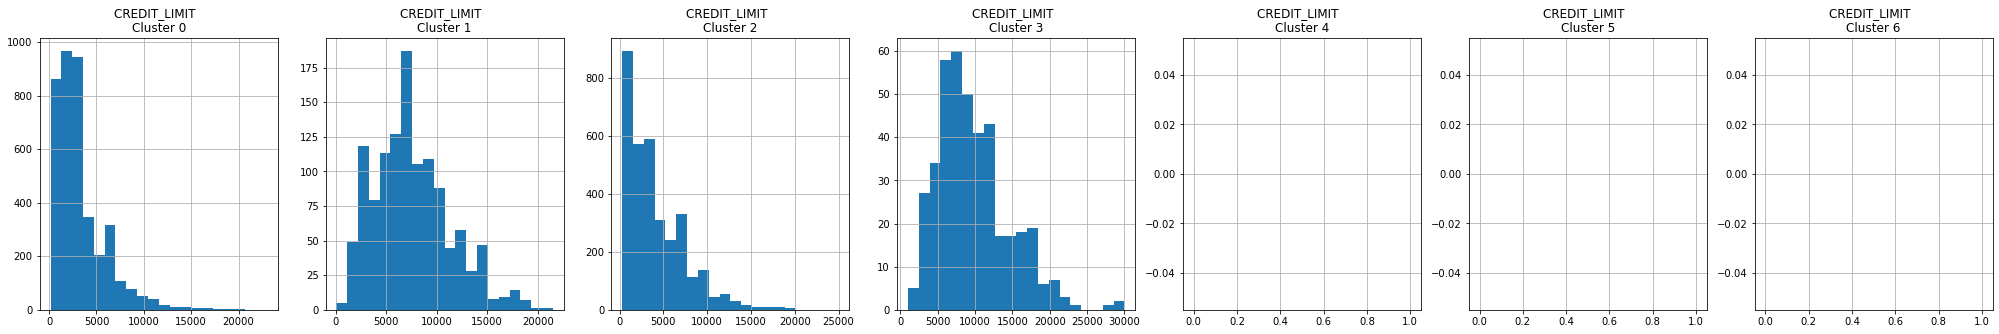

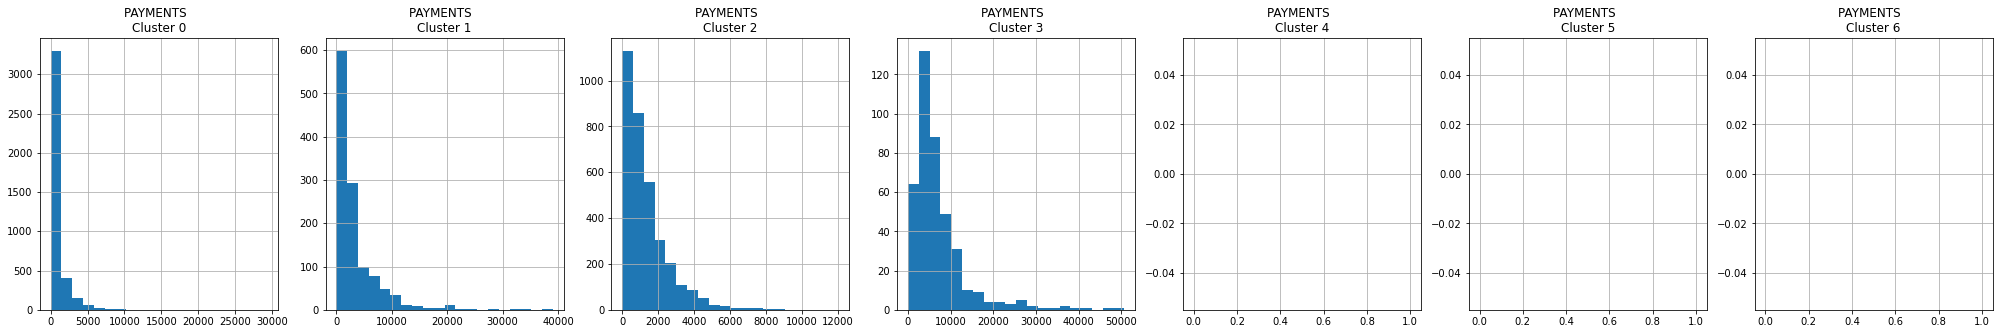

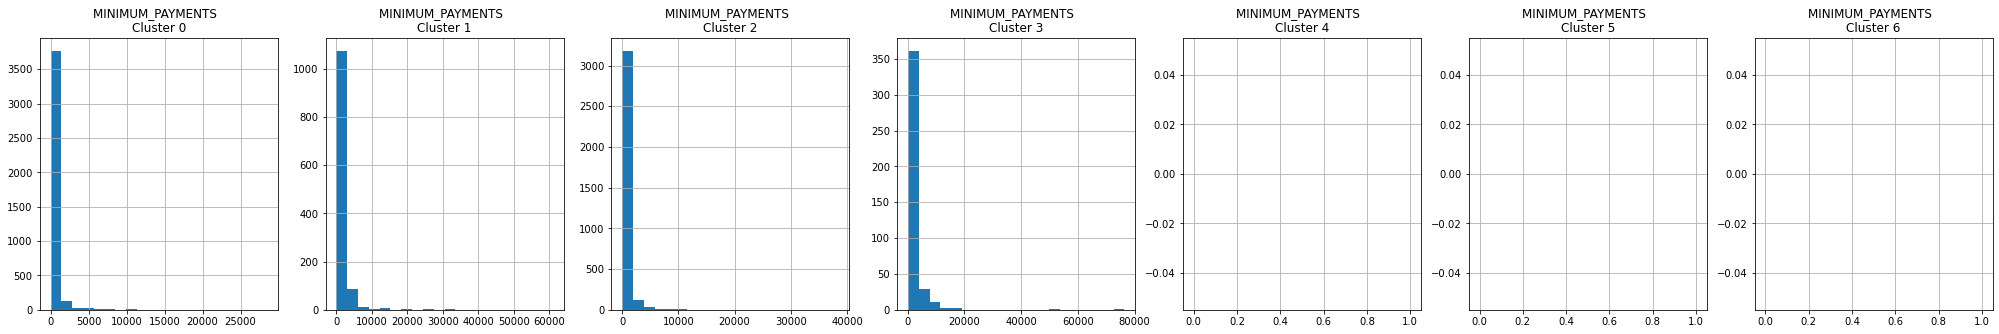

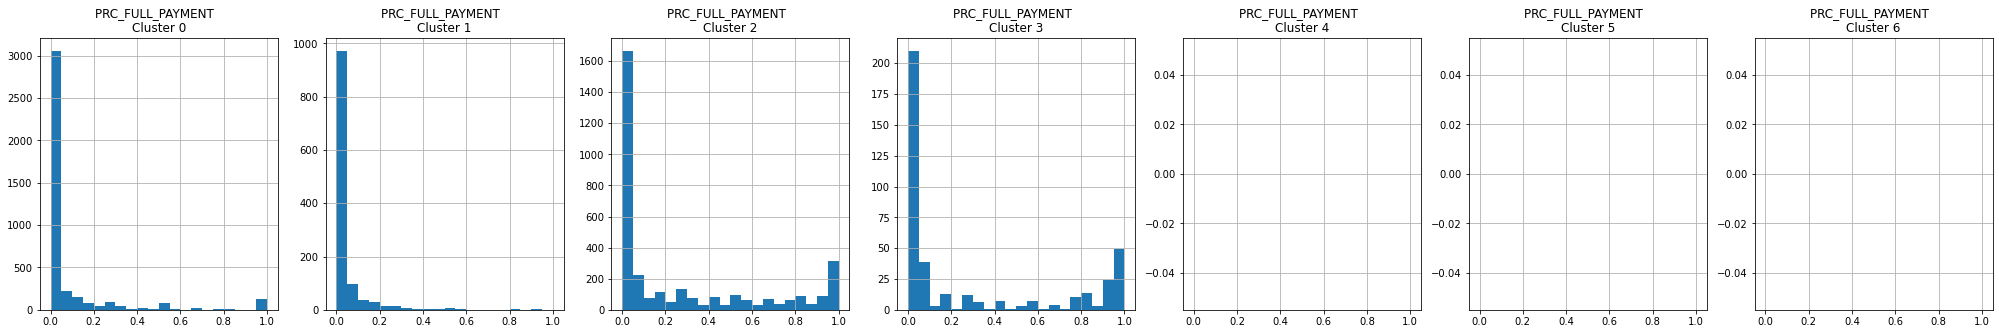

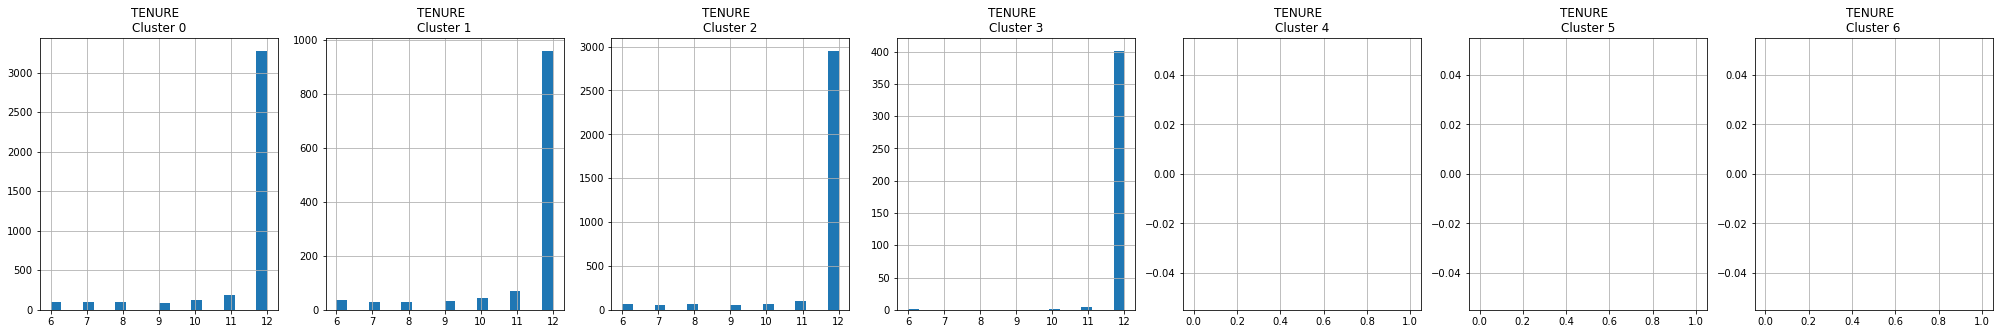

In [26]:
# Plot the histogram of various clusters
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}  \nCluster {}'.format(i,j))
        
plt.show()

Text(0, 0.5, 'Purchases')

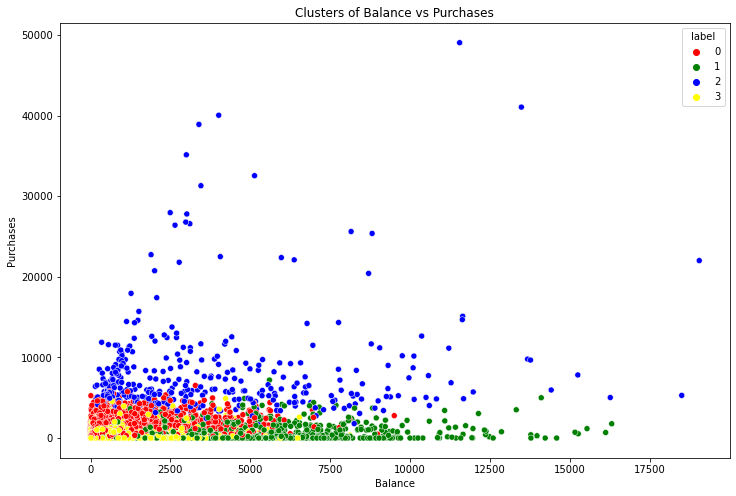

In [27]:
label = kmeans.fit_predict(df_scaled)
df['label'] = label
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df['BALANCE'],df['PURCHASES'], hue=df['label'], palette=['red','green','blue','yellow'])
plt.title('Clusters of Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')

### Apply PCA 

###  Principal Component Analysis (PCA) 
- PCA is an unsupervised machine learning algorithm.
- PCA performs dimensionality reductions while attemting at keeping the original information unchanged.
- PCA works by trying to find a new set of features called components.
- Components are composites of the uncorrelated given input features.

In [28]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222111, -1.07645764],
       [-1.13829911,  2.50643735],
       [ 0.96968049, -0.38353888],
       ...,
       [-0.92620164, -1.81076825],
       [-2.33655191, -0.65796548],
       [-0.55642409, -0.40047793]])

In [29]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076458
1,-1.138299,2.506437
2,0.969680,-0.383539
3,-0.873626,0.043174
4,-1.599435,-0.688589


In [30]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076458,0
1,-1.138299,2.506437,1
2,0.969680,-0.383539,2
3,-0.873626,0.043174,0
4,-1.599435,-0.688589,0


>Here is the scatter plot of balance and purchases seperated by clusters

>>Here we can see that cluster 0 are high spenders with the highest balance while cluster 1 are people with higher balance but not as big of spenders. Cluster 2,3 are people who do not spend as much and have relatively lower balance (down to zero).

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df,
                     palette = ['red','green','blue','yellow'])
plt.show()

## CONCLUSION

*In conclusion, with this information from our cluster analysis, as a credit card company, we could spend more time on marketing campaigns on the right people. People in cluster 0 and 1 clearly have the capacity to spend and since they are already spending we could use their spending habits to optimize the strategies to get them to spend even more. The analysis also tells us that there is untapped potential in people from cluster 2 and 3. These people already some balance but are not purchasing as much, with the right push we might be able to get them to use the card for spending and become important sources of revenue.*